**IMPORTING LIBRARY**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split as tts

**IMPORTING THE DATA**

In [2]:
data=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**DROPPING THE NULL VALUES**

In [3]:
data=data.dropna()
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [4]:
df=data[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi','stroke']]
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
5,81.0,0,0,186.21,29.0,1


**ENCODING THE NON NUMERICAL COLUMNS**

In [5]:
le=LabelEncoder()
df['gender']=le.fit_transform(data['gender'])
df['ever_married']=le.fit_transform(data['ever_married'])
df['work_type']=le.fit_transform(data['work_type'])
df['Residence_type']=le.fit_transform(data['Residence_type'])
df['smoking_status']=le.fit_transform(data['smoking_status'])
df.head()

<ipython-input-5-df112d9fe1dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender']=le.fit_transform(data['gender'])
<ipython-input-5-df112d9fe1dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ever_married']=le.fit_transform(data['ever_married'])
<ipython-input-5-df112d9fe1dd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
0,67.0,0,1,228.69,36.6,1,1,1,2,1,1
2,80.0,0,1,105.92,32.5,1,1,1,2,0,2
3,49.0,0,0,171.23,34.4,1,0,1,2,1,3
4,79.0,1,0,174.12,24.0,1,0,1,3,0,2
5,81.0,0,0,186.21,29.0,1,1,1,2,1,1


In [6]:
data.shape,df.shape

((4909, 12), (4909, 11))

In [7]:
y=df['stroke']
x=df.drop('stroke',axis=1)
x.shape,y.shape

((4909, 10), (4909,))

**PLOTTING THE COUNTS OF STROKE**

<ipython-input-8-89fca37c8ae9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=df, palette='pastel')


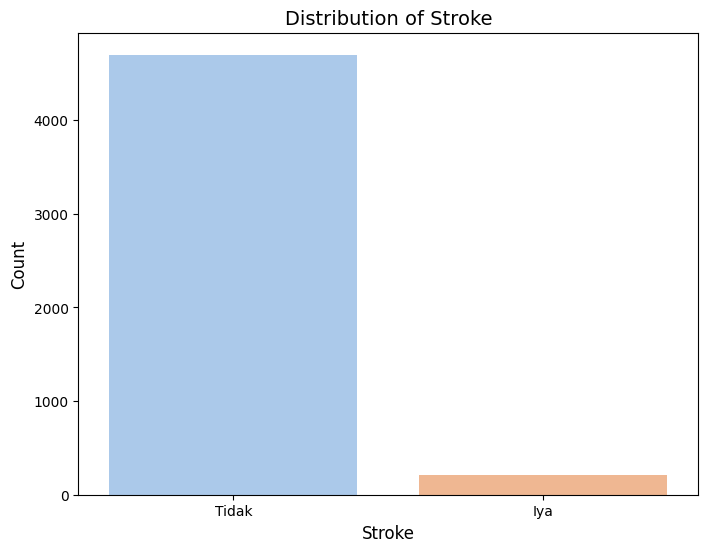

In [8]:
# Membuat subplot
plt.figure(figsize=(8, 6))

# Menggunakan countplot untuk menggambarkan distribusi 'stroke' dengan warna yang berbeda
sns.countplot(x='stroke', data=df, palette='pastel')

# Memberi label sumbu x
plt.xlabel('Stroke', fontsize=12)

# Memberi label sumbu y
plt.ylabel('Count', fontsize=12)

# Mengganti label pada sumbu x
plt.xticks([0, 1], ['Tidak', 'Iya'])

# Memberi judul plot
plt.title('Distribution of Stroke', fontsize=14)

# Menampilkan grafik
plt.show()

**SPLITTING THE DATA INTO TRAINING AND TESTING DATA**

In [9]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2)

**CREATING ARTIFICIAL NEURAL NETWORK MODEL[ANN]**

In [10]:
ann=tf.keras.Sequential()

ann.add(tf.keras.layers.Dense(units=25,activation='relu'))

ann.add(tf.keras.layers.Dense(units=25,activation='relu'))

ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

ann.compile('adam','binary_crossentropy',metrics=['accuracy'])

**TRAINING ANN MODEL**

In [11]:
result=ann.fit(x_train,y_train,epochs=10)

Epoch 1/10
123/123 [==============================] - 1s 1ms/step - loss: 0.2886 - accuracy: 0.9542
Epoch 2/10
123/123 [==============================] - 0s 1ms/step - loss: 0.1789 - accuracy: 0.9547
Epoch 3/10
123/123 [==============================] - 0s 1ms/step - loss: 0.1801 - accuracy: 0.9519
Epoch 4/10
123/123 [==============================] - 0s 1ms/step - loss: 0.1917 - accuracy: 0.9509
Epoch 5/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1744 - accuracy: 0.9537
Epoch 6/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1769 - accuracy: 0.9524
Epoch 7/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1804 - accuracy: 0.9529
Epoch 8/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1882 - accuracy: 0.9498
Epoch 9/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1805 - accuracy: 0.9516
Epoch 10/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1663 - accuracy: 0.9539

**CREATING CONFUSION MATRIX FOR THE ACTUAL AND PREDICTED VALUE**

In [12]:
# Memperoleh prediksi dari model
y_pred = (ann.predict(x_test) > 0.5).astype(int)

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(cm)

31/31 [==============================] - 0s 1ms/step
Confusion Matrix:
[[936  10]
 [ 34   2]]


31/31 [==============================] - 0s 1ms/step


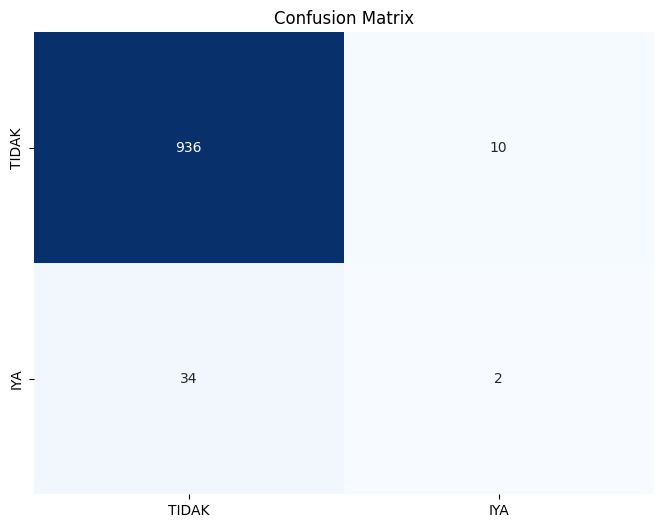

In [13]:
# Memperoleh prediksi dari model
y_pred = (ann.predict(x_test) > 0.5).astype(int)

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat heatmap dari confusion matrix menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['TIDAK', 'IYA'], yticklabels=['TIDAK', 'IYA'])

# Menambahkan judul
plt.title('Confusion Matrix')

# Menampilkan grafik
plt.show()

**ACCURACY SCORE FOR TESTING DATA**

In [14]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.955193482688391

**VISUALISASI MODEL**

Confusion Matrix:
[[936  10]
 [ 34   2]]

Accuracy Score: 0.955193482688391


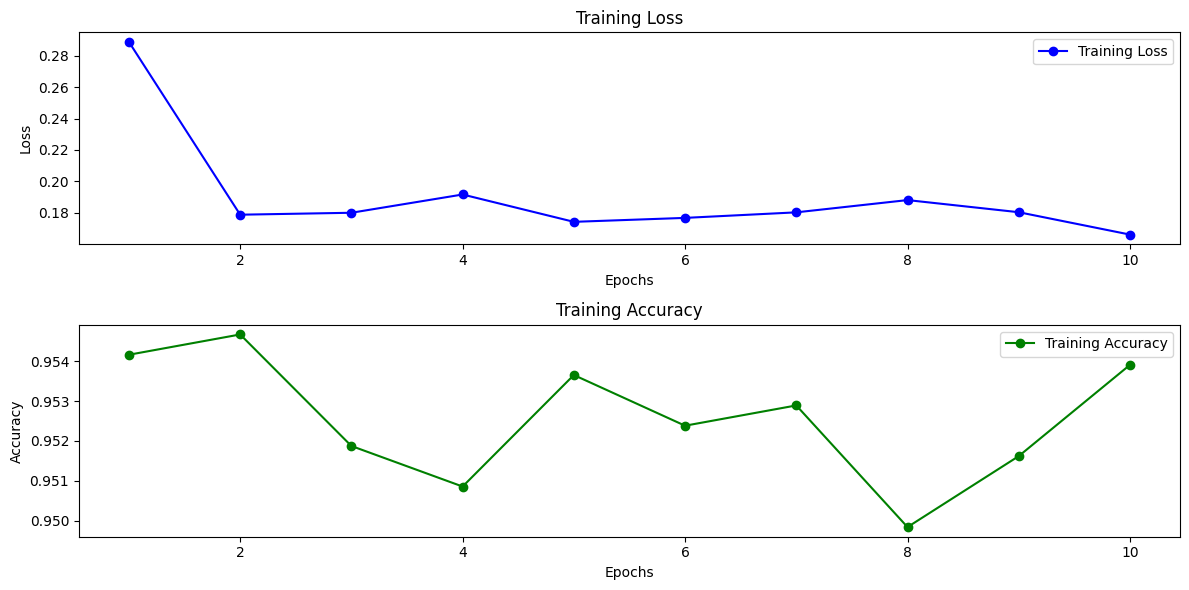

In [15]:
# Memvisualisasikan arsitektur model
plot_model(ann, show_shapes=True, show_layer_names=True)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)

# Menampilkan confusion matrix and akurasinya
print("Confusion Matrix:")
print(cm)
print("\nAccuracy Score:", accuracy)

# Plotting Loss and Accuracy selama training
loss = result.history['loss']
accuracy = result.history['accuracy']
epochs = range(1, len(loss) + 1)

# Plotting Loss and Accuracy in line plots
plt.figure(figsize=(12, 6))

# Loss Plot
plt.subplot(2, 1, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(2, 1, 2)
plt.plot(epochs, accuracy, 'go-', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()